In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [337]:
import os 
os.getcwd() 

'/Users/maxim/Downloads/FE 4'

In [338]:
data = pd.read_csv('/Users/maxim/Downloads/kobe.csv')

In [339]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [340]:
data.shape

(30697, 25)

In [341]:
# посмотрим на все признаки в data
data.T

,0,1,2,3,4,5,6,7,8,9,...,30687,30688,30689,30690,30691,30692,30693,30694,30695,30696
action_type,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Driving Dunk Shot,Jump Shot,Layup Shot,Jump Shot,Jump Shot,Running Jump Shot,...,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Driving Layup Shot,Jump Shot,Tip Shot,Running Jump Shot,Jump Shot,Jump Shot
combined_shot_type,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Dunk,Jump Shot,Layup,Jump Shot,Jump Shot,Jump Shot,...,Jump Shot,Jump Shot,Jump Shot,Jump Shot,Layup,Jump Shot,Tip Shot,Jump Shot,Jump Shot,Jump Shot
game_event_id,10,12,35,43,155,244,251,254,265,294,...,284,308,326,331,382,397,398,426,448,471
game_id,20000012,20000012,20000012,20000012,20000012,20000012,20000012,20000012,20000012,20000012,...,49900088,49900088,49900088,49900088,49900088,49900088,49900088,49900088,49900088,49900088
lat,33.9723,34.0443,33.9093,33.8693,34.0443,34.0553,34.0443,34.0163,33.9363,33.9193,...,33.9443,33.9833,33.3653,33.9443,34.0443,33.9963,34.0443,33.8783,33.7773,33.9723
loc_x,167,-157,-101,138,0,-145,0,1,-65,-33,...,40,-126,-12,-113,0,1,0,-134,31,1
loc_y,72,0,135,175,0,-11,0,28,108,125,...,100,61,679,100,0,48,0,166,267,72
lon,-118.103,-118.427,-118.371,-118.132,-118.27,-118.415,-118.27,-118.269,-118.335,-118.303,...,-118.23,-118.396,-118.282,-118.383,-118.27,-118.269,-118.27,-118.404,-118.239,-118.269
minutes_remaining,10,10,7,6,6,9,8,8,6,3,...,3,1,0,11,7,6,6,3,2,0
period,1,1,1,1,2,3,3,3,3,3,...,3,3,3,4,4,4,4,4,4,4


In [342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [343]:
# избавимся от NaN shot_made_flag.Если это target, то смысла ипользовать NaN нет 

In [344]:
data.dropna(inplace = True)

In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

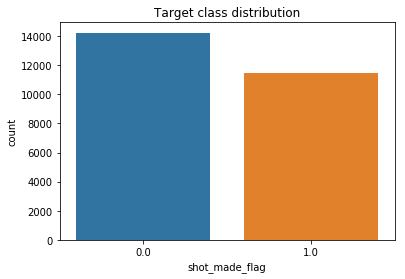

In [346]:
# посмотрим на распределение short_made_flag
ax = plt.axes()
sns.countplot(x='shot_made_flag', data=data, ax=ax);
ax.set_title('Target class distribution')
plt.show()

In [347]:
# построим схему половины площадки

In [348]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

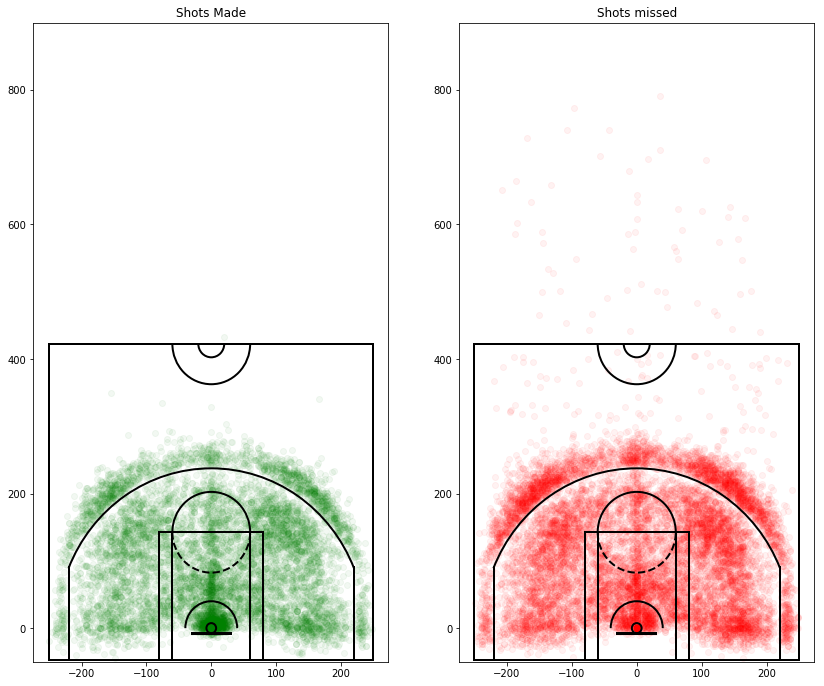

In [349]:
# Посмотрим из какиз зон совершались броски

# схема
court_scale, alpha = 7, 0.05
plt.figure(figsize=(2 * court_scale, court_scale*(84.0/50.0)))
# удачный бросок
plt.subplot(121)
h = data.loc[data.shot_made_flag == 1]
plt.scatter(h.loc_x, h.loc_y, color='green', alpha=alpha)
plt.title('Shots Made')
ax = plt.gca()
ax.set_ylim([-50, 900])
draw_court(outer_lines=True)
# неудачный
plt.subplot(122)
h = data.loc[data.shot_made_flag == 0]
plt.scatter(h.loc_x, h.loc_y, color='red', alpha=alpha)
plt.title('Shots missed')
ax = plt.gca()
ax.set_ylim([-50, 900])
draw_court(outer_lines=True)

In [350]:
# из-под основная часть удачных бросков

In [351]:
# посмотрим на типы бросков action_type
data['action_type'].value_counts(dropna = False)

Jump Shot                          15836
Layup Shot                          2154
Driving Layup Shot                  1628
Turnaround Jump Shot                 891
Fadeaway Jump Shot                   872
Running Jump Shot                    779
Pullup Jump shot                     402
Turnaround Fadeaway shot             366
Slam Dunk Shot                       334
Reverse Layup Shot                   333
Jump Bank Shot                       289
Driving Dunk Shot                    257
Dunk Shot                            217
Tip Shot                             151
Step Back Jump shot                  106
Alley Oop Dunk Shot                   95
Floating Jump shot                    93
Driving Reverse Layup Shot            83
Hook Shot                             73
Driving Finger Roll Shot              68
Alley Oop Layup shot                  67
Reverse Dunk Shot                     61
Driving Finger Roll Layup Shot        59
Turnaround Bank shot                  58
Running Layup Sh

In [352]:
# посмотрим на типы бросков combined_shot_type
data['combined_shot_type'].value_counts(dropna = False)

Jump Shot    19710
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: combined_shot_type, dtype: int64

In [353]:
# посмотрим в процентах на долю бросков
data['combined_shot_type'].value_counts(dropna = False,normalize = True)*100

Jump Shot    76.701560
Layup        17.636300
Dunk          4.109429
Tip Shot      0.591509
Hook Shot     0.494221
Bank Shot     0.466981
Name: combined_shot_type, dtype: float64

In [354]:
# посмотрим в процентах на долю бросков (удачных)

np.round(
    data[data['shot_made_flag'] == 1]['combined_shot_type'].value_counts()
    /
    data['combined_shot_type'].value_counts()
*100,2)


Bank Shot    79.17
Dunk         92.80
Hook Shot    53.54
Jump Shot    39.11
Layup        56.51
Tip Shot     34.87
Name: combined_shot_type, dtype: float64

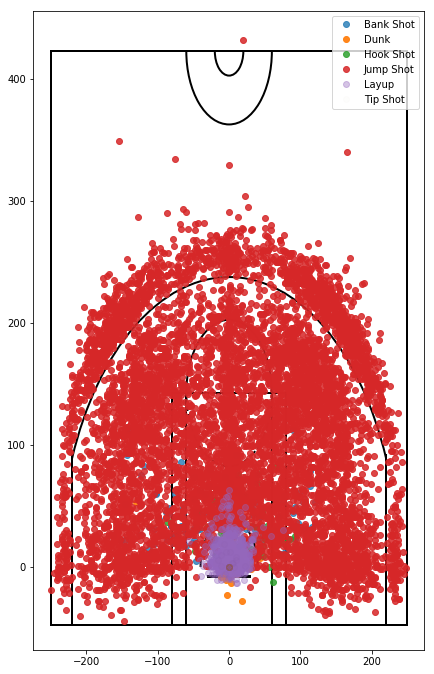

In [355]:
# Удачные броски combined_shot_type
groups = data[(data['shot_made_flag'] == 1)].groupby('combined_shot_type')


fig, ax = plt.subplots(figsize=(court_scale, court_scale*(84.0/50.0)))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
alpha = 0.2
alphas, n = [], float(len(data.combined_shot_type))
for u in [i[0] for i in groups]:
    d = len(data.loc[data.combined_shot_type == u, 'combined_shot_type'])
    alphas.append(np.log1p(d))
for (name, group), alp in zip(groups, alphas):
    ax.plot(group.loc_x, group.loc_y,
            marker='.', linestyle='', ms=12,
            label=name, alpha=alp)
ax.legend()
draw_court(outer_lines=True)
# справа трехочковые лучше получались
# можно заметить, что есть выбросы

/Users/maxim/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/maxim/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


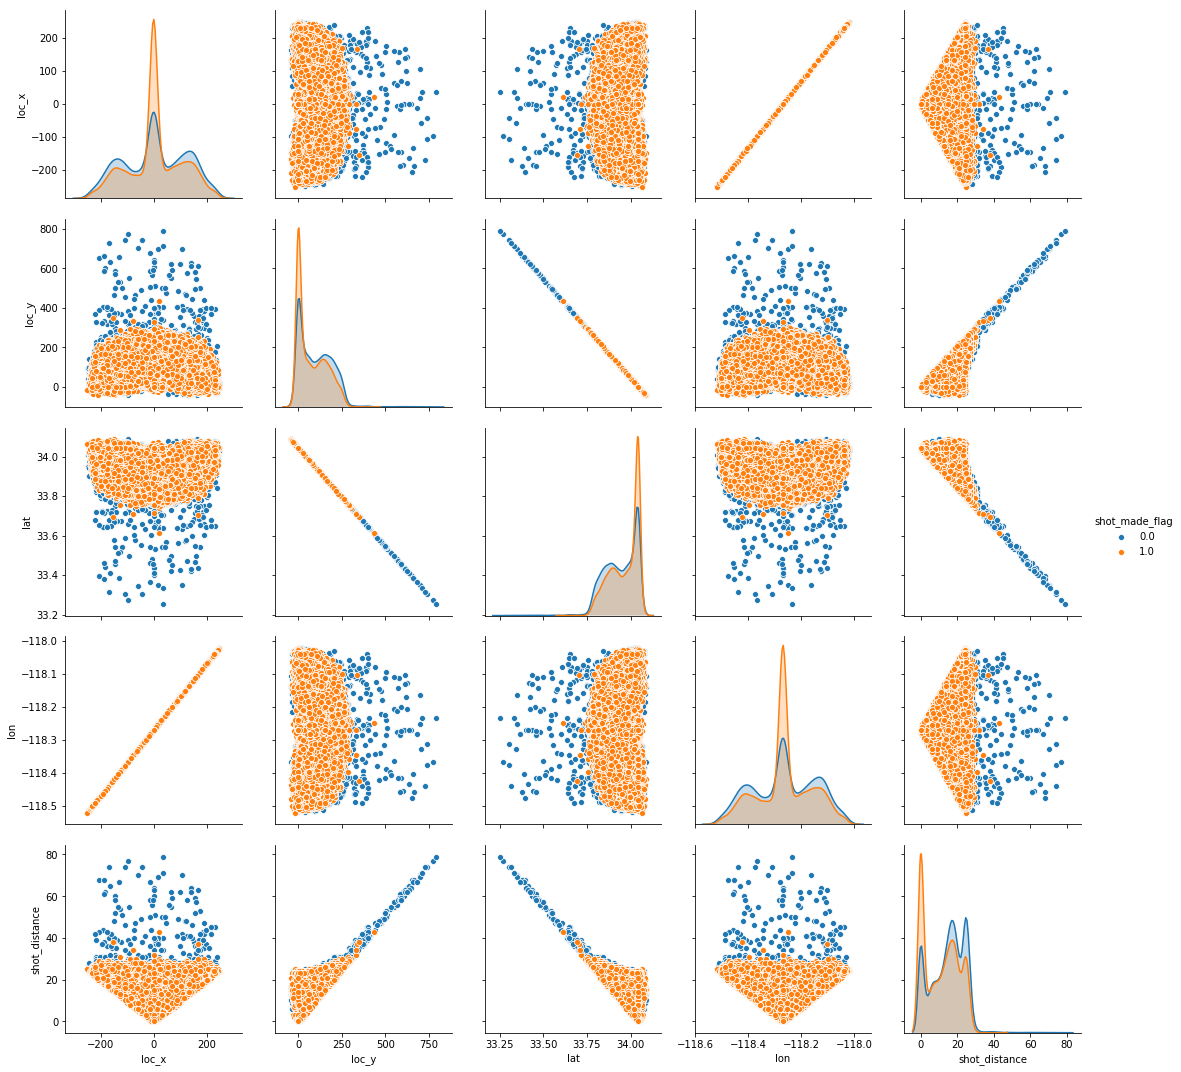

In [356]:
# Посмотрим на связи между loc_x', 'loc_y', 'lat', 'lon', 'shot_distance'
sns.pairplot(data, vars=['loc_x', 'loc_y', 'lat', 'lon', 'shot_distance'], hue='shot_made_flag', size=3)
plt.show()

In [357]:
# loc_x & lon , loc_y & lat есть корреляция , в дальнейшем lon & lat удалим из df

In [358]:
# изменим season , чтобы на графике отображалось по возрастанию
data['season'] = data['season'].astype('category')

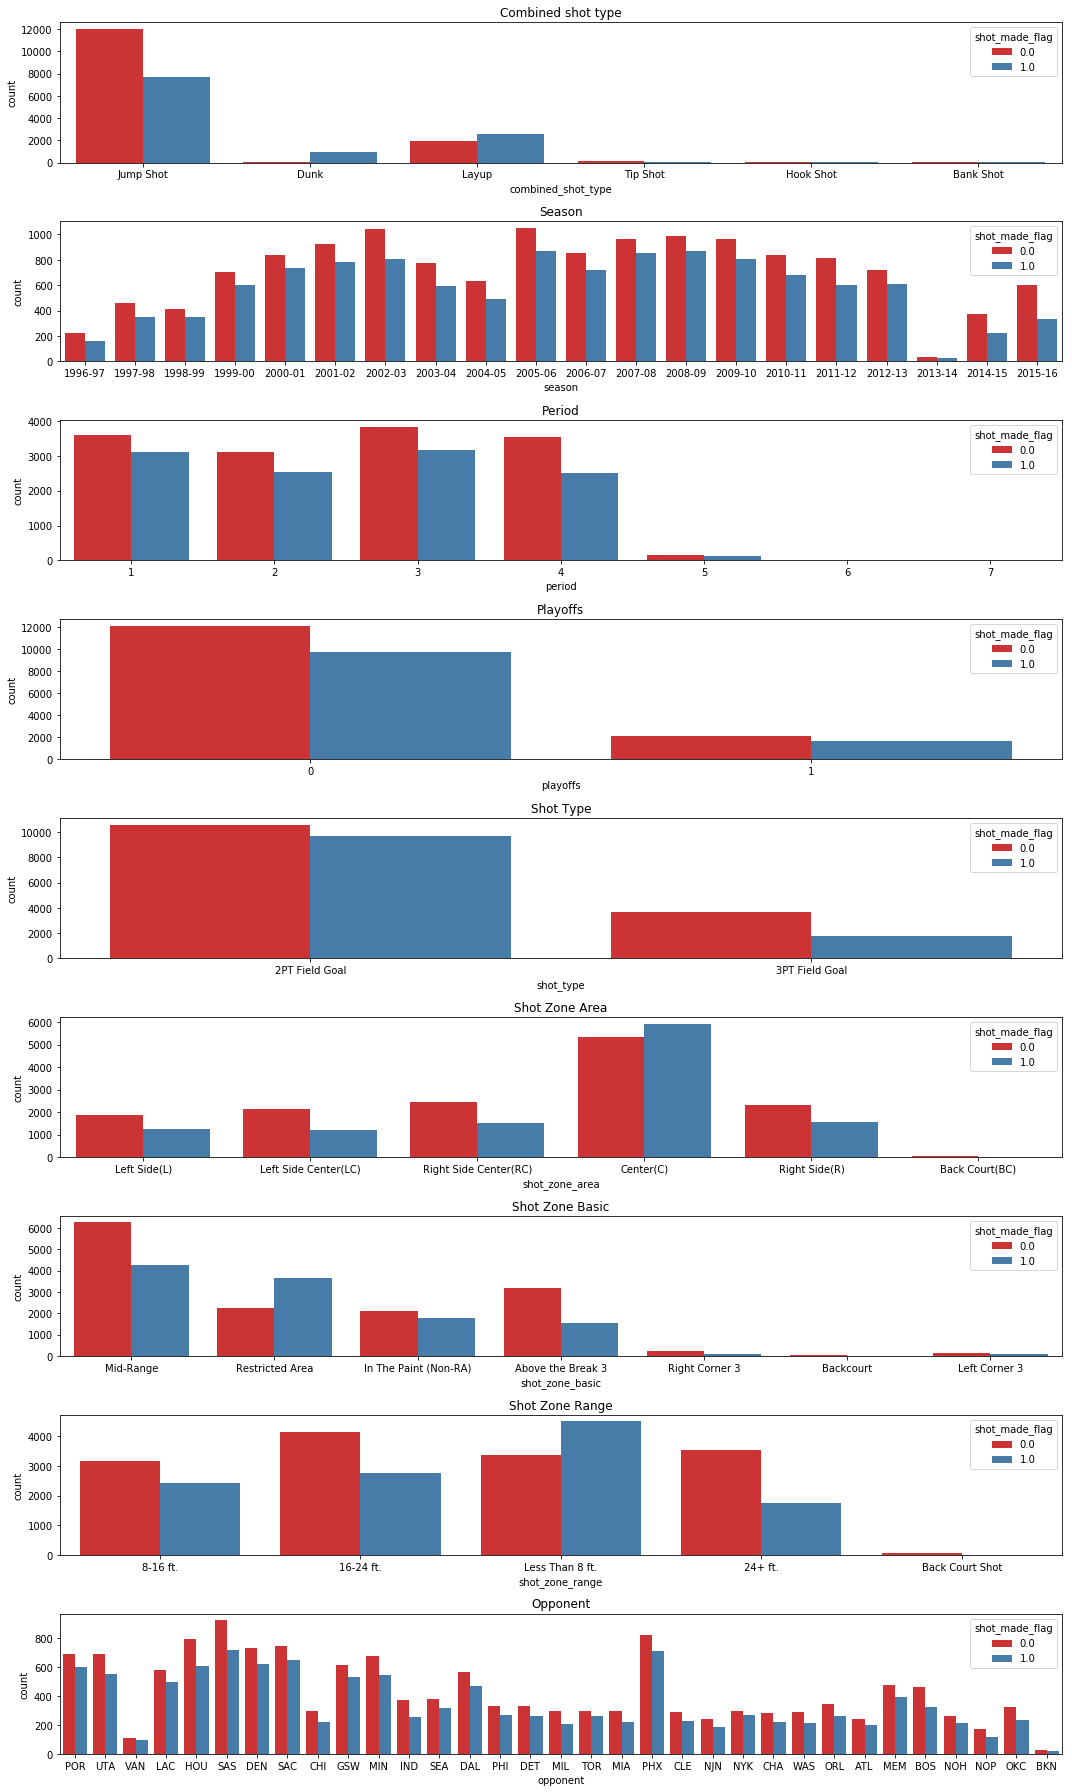

In [359]:
# посмотрим на shot_made_flag в зависимости от признаков
f, axarr = plt.subplots(9, figsize=(15, 25))

sns.countplot(x='combined_shot_type', hue='shot_made_flag', data=data, ax=axarr[0],palette="Set1")
sns.countplot(x='season', hue='shot_made_flag', data=data, ax=axarr[1],palette="Set1")
sns.countplot(x='period', hue='shot_made_flag', data=data, ax=axarr[2],palette="Set1")
sns.countplot(x='playoffs', hue='shot_made_flag', data=data, ax=axarr[3],palette="Set1")
sns.countplot(x='shot_type', hue='shot_made_flag', data=data, ax=axarr[4],palette="Set1")
sns.countplot(x='shot_zone_area', hue='shot_made_flag', data=data, ax=axarr[5],palette="Set1")
sns.countplot(x='shot_zone_basic', hue='shot_made_flag', data=data, ax=axarr[6],palette="Set1")
sns.countplot(x='shot_zone_range', hue='shot_made_flag', data=data, ax=axarr[7],palette="Set1")
sns.countplot(x='opponent', hue='shot_made_flag', data=data, ax=axarr[8],palette="Set1")

axarr[0].set_title('Combined shot type')
axarr[1].set_title('Season')
axarr[2].set_title('Period')
axarr[3].set_title('Playoffs')
axarr[4].set_title('Shot Type')
axarr[5].set_title('Shot Zone Area')
axarr[6].set_title('Shot Zone Basic')
axarr[7].set_title('Shot Zone Range')
axarr[8].set_title('Opponent')

plt.tight_layout()
plt.show()

In [360]:
# посмотрим на броски в течение периода 
period_df = (data.groupby(['period','minutes_remaining'])[['shot_made_flag']].sum()/
data.groupby(['period','minutes_remaining'])[['shot_made_flag']].count())
accuracy = period_df.rename(columns={'shot_made_flag':'accuracy'})
accuracy.unstack()
# выделим отдельно основное время (4 периода ) и дополнительное (3 периода)
accuracy_main_time = accuracy.unstack().head(4)
accuracy_overtime = accuracy.unstack().iloc[4:7]

In [361]:
# статистики удачных бросков в overtime
accuracy_overtime.describe()

accuracy                                                    \
minutes_remaining        0         1         2         3         4    5    6    
count              3.000000  3.000000  3.000000  3.000000  3.000000  0.0  0.0   
mean               0.398551  0.389731  0.647436  0.291667  0.335859  NaN  NaN   
std                0.131487  0.338764  0.306689  0.260208  0.333362  NaN  NaN   
min                0.250000  0.000000  0.442308  0.000000  0.000000  NaN  NaN   
25%                0.347826  0.277778  0.471154  0.187500  0.170455  NaN  NaN   
50%                0.445652  0.555556  0.500000  0.375000  0.340909  NaN  NaN   
75%                0.472826  0.584596  0.750000  0.437500  0.503788  NaN  NaN   
max                0.500000  0.613636  1.000000  0.500000  0.666667  NaN  NaN   

                                            
minutes_remaining   7    8    9    10   11  
count              0.0  0.0  0.0  0.0  0.0  
mean               NaN  NaN  NaN  NaN  NaN  
std                NaN  NaN  NaN  NaN  NaN  
min                NaN  NaN  NaN  NaN  NaN  
25%                NaN  NaN  NaN  NaN  NaN  
50%                NaN  NaN  NaN  NaN  NaN  
75%                NaN  NaN  NaN  NaN  NaN  
max                NaN  NaN  NaN  NaN  NaN

In [362]:
# статистики удачных бросков в main_time
accuracy_main_time.describe()
# среденее попадание самое высокое на 10 минуте(колонка 9)

accuracy                                                    \
minutes_remaining        0         1         2         3         4         5    
count              4.000000  4.000000  4.000000  4.000000  4.000000  4.000000   
mean               0.379048  0.445723  0.445274  0.452871  0.454174  0.466361   
std                0.024878  0.023597  0.039554  0.037029  0.041678  0.022660   
min                0.359740  0.413534  0.390335  0.399654  0.397188  0.446069   
25%                0.367332  0.436045  0.432450  0.441786  0.440977  0.447678   
50%                0.370434  0.451016  0.453946  0.465812  0.461553  0.464142   
75%                0.382150  0.460694  0.466770  0.476896  0.474750  0.482824   
max                0.415584  0.467327  0.482871  0.480207  0.496403  0.491089   

                                                                               
minutes_remaining        6         7         8         9         10        11  
count              4.000000  4.000000  4.000000  4.000000  4.000000  4.000000  
mean               0.470509  0.483900  0.431380  0.475850  0.449575  0.424261  
std                0.020426  0.012284  0.018583  0.050307  0.024914  0.016001  
min                0.439922  0.471455  0.407713  0.400504  0.415842  0.407258  
25%                0.469301  0.474463  0.421559  0.473077  0.439255  0.412790  
50%                0.480093  0.483863  0.433996  0.499499  0.454622  0.424114  
75%                0.481301  0.493300  0.443817  0.502273  0.464942  0.435585  
max                0.481928  0.496420  0.449814  0.503900  0.473214  0.441558

In [363]:
# Переведем даты.Разделим год, месяц, день (0 = Monday, 6 = Sunday)
data['game_date'] = pd.to_datetime(data['game_date'])
data['game_year'] = data['game_date'].dt.year
data['game_month'] = data['game_date'].dt.month
data['game_day'] = data['game_date'].dt.dayofweek

#удалим потом game_date'

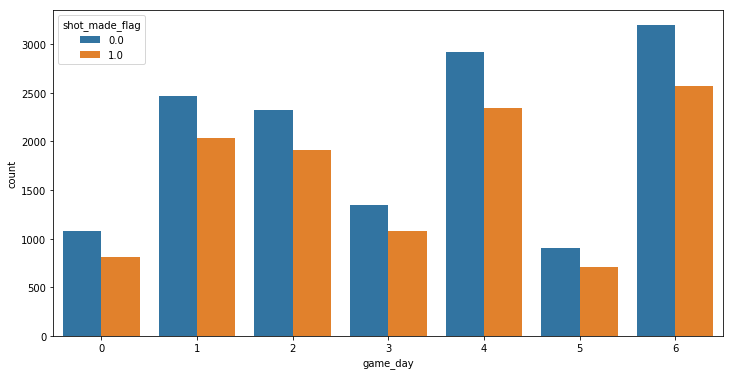

In [364]:
# посмотрим зависимость от дня недели
plt.figure(figsize=(12,6))
sns.countplot(x='game_day', hue='shot_made_flag', data=data)
# понедельник, четверг и суббота выделяются на фоне других дней

## Почистим данные

In [365]:
data_cl = data.copy() # создадим копию df
target = data_cl['shot_made_flag'].copy()

# удалим некоторые columns
data_cl.drop('team_id', axis=1, inplace=True) # Всегда один и тот же
data_cl.drop('lat', axis=1, inplace=True) # корреляция loc_x
data_cl.drop('lon', axis=1, inplace=True) # корреляция loc_y
data_cl.drop('game_id', axis=1, inplace=True) # независимая
data_cl.drop('game_event_id', axis=1, inplace=True) # независимая
data_cl.drop('team_name', axis=1, inplace=True) # Всегда LA Lakers
data_cl.drop('shot_made_flag', axis=1, inplace=True)

## Cоздадим/преобразуем новые фичи

In [366]:
# Remaining time (объединим в секунды)
data_cl['seconds_from_period_end'] = 60 * data_cl['minutes_remaining'] + data_cl['seconds_remaining']


# удалим ненужные 
data_cl.drop('minutes_remaining', axis=1, inplace=True)
data_cl.drop('seconds_remaining', axis=1, inplace=True)

## Matchup - (в гостях/дома)
data_cl['home_play'] = data_cl['matchup'].apply(lambda x: int('vs.' in x))
data_cl.drop('matchup', axis=1, inplace=True)

# Game date
data_cl.drop('game_date', axis=1, inplace=True)

# Loc_x, and loc_y 
# Функция cut() может быть использована для разбиения на группы количественной переменной.
# Потом применим get_dummies
data_cl['loc_x'] = pd.cut(data_cl['loc_x'], 25)
data_cl['loc_y'] = pd.cut(data_cl['loc_y'], 25)

# поместим 20 редких action types в 'Other'
rare_action_types = data_cl['action_type'].value_counts().sort_values().index.values[:20]
data_cl.loc[data_cl['action_type'].isin(rare_action_types), 'action_type'] = 'Other'

In [367]:
data_cl.shape

(25697, 19)

In [368]:
# Применим one-hot encoding для ктегориальных признаков 
categorial_cols = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_year',
    'game_month', 'opponent', 'loc_x', 'loc_y']

for cc in categorial_cols:
    dummies = pd.get_dummies(data_cl[cc])
    dummies = dummies.add_prefix("{}#GOH".format(cc))
    data_cl.drop(cc, axis=1, inplace=True)
    data_cl = data_cl.join(dummies)

In [369]:
data_cl.shape

(25697, 208)

In [370]:
X = data_cl.as_matrix()
y = data['shot_made_flag']

/Users/maxim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


## Обычная регрессия

#### Линейная регрессия
$$RSS = \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j * x_{ij})^2$$

In [371]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [372]:
lm = LinearRegression().fit(X, y)
print(lm.intercept_)
#print(lm.coef_)

0.3915371621469925


In [373]:
rss_lm = np.sum((lm.predict(X)) ** 2)
print("RSS_lm:", rss_lm)

RSS_lm: 6105.774113835043


## Ridge регрессия

#### Ridge
$$RSS = \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j * x_{ij})^2 + \lambda \sum_{j=1}^p \beta_j^2$$

In [374]:
rg = Ridge(alpha=1000).fit(X, y)
print(rg.intercept_)
#print(rg.coef_)

0.6696346409891206


In [375]:
rss_rg = np.sum((rg.predict(X)) ** 2)
print("RSS_rg:", rss_rg)

RSS_rg: 5712.673291573244


## Lasso регрессия

#### Lasso
$$RSS = \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j * x_{ij})^2 + \lambda \sum_{j=1}^p |\beta_j|$$

In [376]:
ls = Lasso().fit(X, y)
print(ls.intercept_)
#print(ls.coef_)
print(set(ls.coef_))
#Почти все коэфф. занулились
# Получается, в моем отборе только две важные переменные?

0.44088389513612
{0.0, 5.0134637181360915e-05, -7.073330572011213e-07}


In [377]:
rss_ls = np.sum((ls.predict(X)) ** 2)
print("RSS_ls:", rss_ls)

RSS_ls: 5119.077125510016


In [378]:
print("RSS_lm:", rss_lm)
print("RSS_rg:", rss_rg)
print("RSS_ls:", rss_ls)

RSS_lm: 6105.774113835043
RSS_rg: 5712.673291573244
RSS_ls: 5119.077125510016


In [379]:
rg_coefs = np.array(rg.coef_)
ls_coefs = np.array(ls.coef_)
lm_coefs = np.array(lm.coef_)

In [405]:
# достанем названия фич
name_of_col = list(map(lambda x: x,data_cl.columns))

In [381]:
# соединим

In [406]:
columns_lm_coefs = dict(zip(name_of_col, lm_coefs))
columns_rg_coefs = dict(zip(name_of_col, rg_coefs))
columns_ls_coefs = dict(zip(name_of_col, ls_coefs))

In [407]:
# преобразуем в DF
columns_lm_coefs = pd.DataFrame([columns_lm_coefs])
columns_rg_coefs = pd.DataFrame([columns_rg_coefs])
columns_ls_coefs = pd.DataFrame([columns_ls_coefs])

In [408]:
# table

In [409]:
table = pd.concat([columns_lm_coefs, columns_rg_coefs, columns_ls_coefs], axis=0, ignore_index=True)

In [410]:
table = table.rename({0: 'Linear Regression', 1: 'Ridge', 2: 'Lasso'}, axis='index')

In [411]:
# Lasso почти все нули получились, Ridge коэфф.< Linear Regression
table.T

,Linear Regression,Ridge,Lasso
action_type#GOHAlley Oop Dunk Shot,6.075107e-02,0.012574,0.000000e+00
action_type#GOHAlley Oop Layup shot,1.510945e-02,0.004997,0.000000e+00
action_type#GOHDriving Dunk Shot,9.841280e-02,0.036832,0.000000e+00
action_type#GOHDriving Finger Roll Layup Shot,1.959608e-01,0.014013,0.000000e+00
action_type#GOHDriving Finger Roll Shot,1.647068e-01,0.014335,0.000000e+00
action_type#GOHDriving Jump shot,-2.679462e-01,-0.003296,-0.000000e+00
action_type#GOHDriving Layup Shot,4.946308e-02,0.068889,0.000000e+00
action_type#GOHDriving Reverse Layup Shot,8.567846e-02,0.010345,0.000000e+00
action_type#GOHDriving Slam Dunk Shot,1.111279e-01,0.007559,0.000000e+00
action_type#GOHDunk Shot,-9.933486e-02,-0.002664,0.000000e+00


**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge на тех же признаках - построить сравнительную таблицу коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. Посчитать RSS

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC